# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import data 
transactions = pd.read_csv("../data/bank_transactions.csv")

transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [3]:
# TODO: view the shape of your data
transactions.shape

(1000000, 10)

In [4]:
# TODO: Begin your EDA
transactions.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000
mean,1.796208e+05,8.351184e+05,8.565104e+05,1.102856e+06,1.227859e+06,0.001297,0.000001
std,6.076181e+05,2.892918e+06,2.928896e+06,3.464915e+06,3.752688e+06,0.035991,0.001000
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.336939e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,7.443500e+04,1.411000e+04,0.000000e+00,1.331849e+05,2.148652e+05,0.000000,0.000000
75%,2.083404e+05,1.073804e+05,1.446566e+05,9.430209e+05,1.110702e+06,0.000000,0.000000
max,9.244552e+07,3.958504e+07,3.893942e+07,3.555534e+08,3.560159e+08,1.000000,1.000000


In [9]:
transactions.isna().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<Axes: >

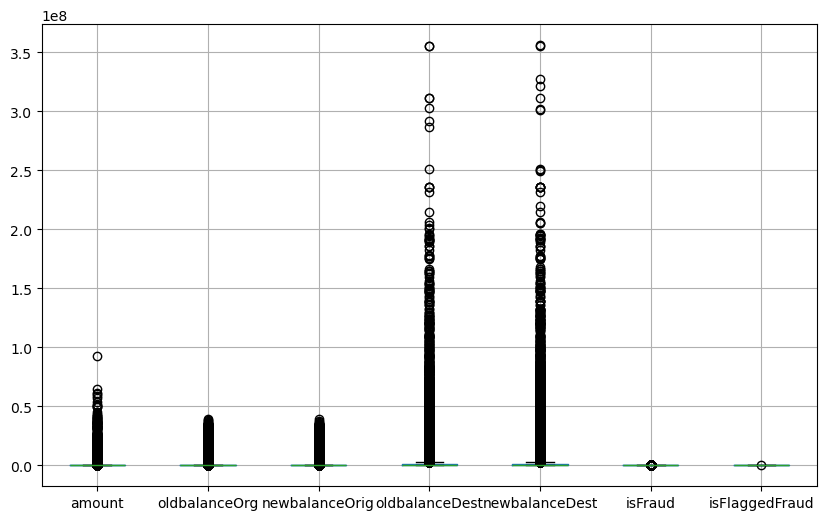

In [11]:
numeric_transcations = transactions.select_dtypes(include=['number'])
numeric_transcations.boxplot(figsize=(10, 6))

<Axes: ylabel='amount'>

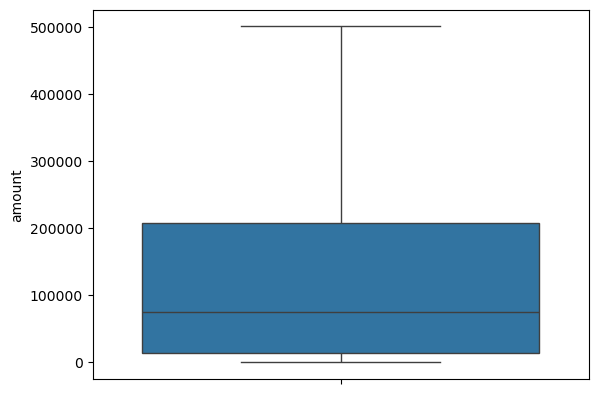

In [10]:
sns.boxplot(y='amount', data=transactions, showfliers=False)

<Axes: ylabel='oldbalanceOrg'>

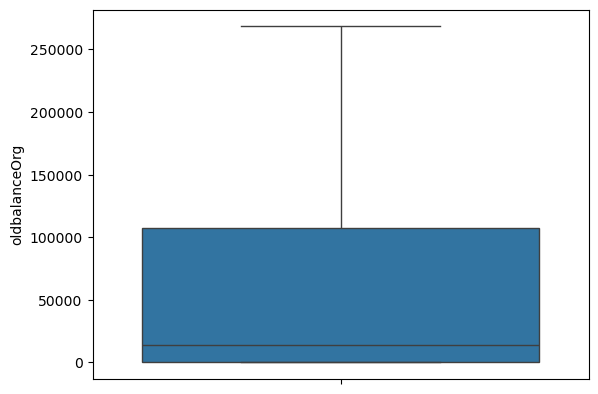

In [11]:
sns.boxplot(y='oldbalanceOrg', data=transactions, showfliers=False)

<Axes: ylabel='oldbalanceDest'>

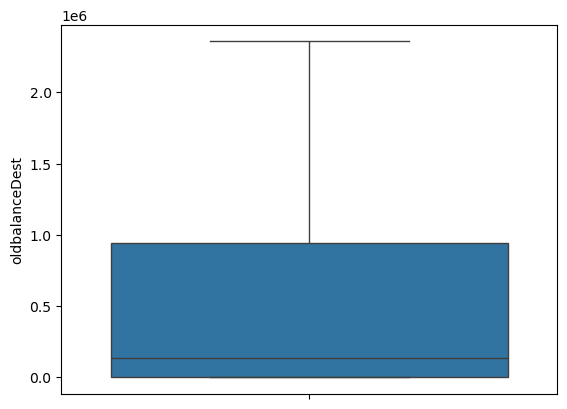

In [12]:
sns.boxplot(y='oldbalanceDest', data=transactions, showfliers=False)

<Axes: >

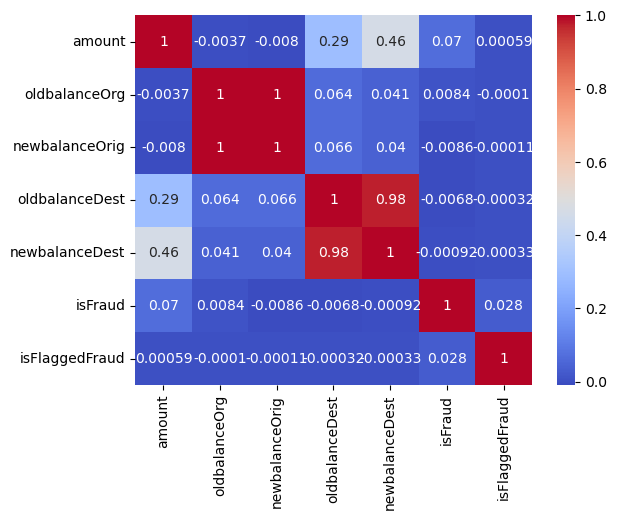

In [12]:
sns.heatmap(numeric_transcations.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='oldbalanceOrg', ylabel='newbalanceOrig'>

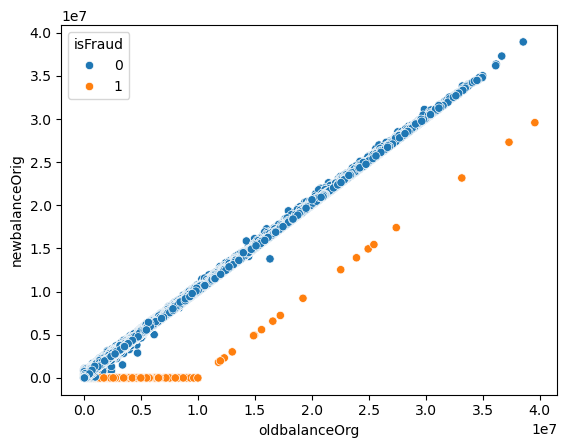

In [9]:
sns.scatterplot(x='oldbalanceOrg', y='newbalanceOrig', data=transactions, hue='isFraud')

In [17]:
transactions.groupby('type')[['amount']].describe()


amount                                                             \
             count           mean           std   min         25%         50%   
type                                                                            
CASH_IN   219955.0  168928.914668  1.267864e+05  0.43   70092.845  142942.990   
CASH_OUT  351360.0  175584.659320  1.703743e+05  0.00   72382.815  146209.915   
DEBIT       6417.0    5445.890813  1.302416e+04  5.24    1530.240    3099.530   
PAYMENT   338573.0   13055.592085  1.256291e+04  0.03    4377.100    9481.670   
TRANSFER   83695.0  911827.155179  1.896175e+06  2.60  217105.800  487883.710   

                                    
                  75%          max  
type                                
CASH_IN   240085.0800   1609288.13  
CASH_OUT  245881.7625  10000000.00  
DEBIT       5423.2500    389762.68  
PAYMENT    17565.5600    230549.18  
TRANSFER  978027.6650  92445516.64

In [4]:
transactions.groupby(['isFraud', 'type'])['amount'].describe()

count          mean           std     min         25%  \
isFraud type                                                                 
0       CASH_IN   219955.0  1.689289e+05  1.267864e+05    0.43   70092.845   
        CASH_OUT  350703.0  1.734277e+05  1.310352e+05    1.74   72339.545   
        DEBIT       6417.0  5.445891e+03  1.302416e+04    5.24    1530.240   
        PAYMENT   338573.0  1.305559e+04  1.256291e+04    0.03    4377.100   
        TRANSFER   83055.0  9.081874e+05  1.892640e+06    2.60  217867.825   
1       CASH_OUT     657.0  1.326971e+06  2.244505e+06    0.00  113309.550   
        TRANSFER     640.0  1.384176e+06  2.262100e+06  164.00  131400.845   

                        50%          75%          max  
isFraud type                                           
0       CASH_IN   142942.99   240085.080   1609288.13  
        CASH_OUT  146085.00   245559.750   2393198.44  
        DEBIT       3099.53     5423.250    389762.68  
        PAYMENT     9481.67    17565.560    230549.18  
        TRANSFER  488022.88   976701.295  92445516.64  
1       CASH_OUT  374178.28  1321091.250  10000000.00  
        TRANSFER  454774.80  1474836.315  10000000.00

In [10]:
pd.pivot_table(transactions, values='amount', index='isFraud', columns='isFlaggedFraud', aggfunc='count')

isFlaggedFraud,0,1
isFraud,,
0,998703.0,NaN
1,1296.0,1.0


## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

Based on the boxplot, the distribution of amount is right skewed, as the median is closer to the 1st quartile. The majority of transactions fall within the range of 10,000 to 200,000, while a significant number of outliers exceed 500,000. Most transactions occur between an origin account and a destination account, where the origin account typically has a lower balance than the destination account. This is shown by the median balances of around 10,000 for the origin account and 100,000 for the destination account, respectively.

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

When comparing oldbalanceOrg and newbalanceOrig, a distinct pattern emerges. According to the generated scatter plot, the majority of fraudulent transactions occur when the new balance after the transaction is 0. This indicates that these transactions are primarily taking money away from the origin account. This can be observed from the fact that, in most fraudulent cases, the newbalanceOrig is significantly lower than the oldbalanceOrg, suggesting that the money are being moved out of the account.

### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

The most common transaction type is cash out. However, the transaction type that consistently involves larger amounts is transfer. Transfer transactions have the highest mean amount of 911827.155179, a standard deviation of 1.896175e+06, and a median of 487883.710. This indicates that transfer transactions not only has highest average amount but also show a greater variability.

### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

The only two transaction types that involve fraudulent activity are cash out and transfer. Compared to non-fraudulent transactions of the same types, fraudulent transactions have a significantly higher average amount. Specifically, the average amount for non-fraudulent cash out and transfer transactions is 1.734277e+05 and 9.081874e+05, respectively. Differently, the average amount for fraudulent cash out transactions is about 1.326971e+06, and for transfer it is 1.384176e+06. This suggests that fraudulent activity is typically associated with larger transaction amounts.

## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

The system’s built-in fraud flag does not align well with actual fraudulent activity. Specifically, there is only 1 transaction that was correctly flagged as fraudulent, while 1296 fraudulent transactions were not flagged by the system. This indicates that the current fraud detection mechanism has very accuracy rate as it fails to identify the vast majority of actual fraud cases.